# Import libaries and data

Classification to predict whether a passenger survives or not

Dataset: Titanic dataset

In [235]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [236]:
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/Titanic/train.csv")

In [237]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [238]:
df.shape

(891, 12)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Exploration and Processing

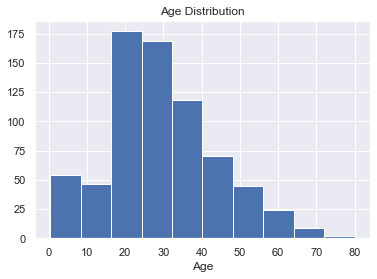

In [241]:
plt.hist(df["Age"])
plt.title("Age Distribution")
plt.xlabel("Age");

Most passengers are aged around 20 to 30

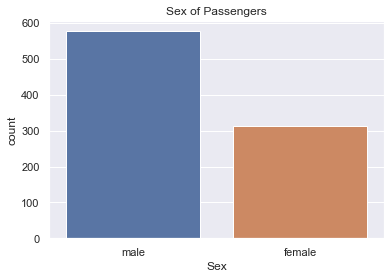

In [242]:
sns.countplot(data = df,x = "Sex")
plt.title("Sex of Passengers");

Most passengers were male

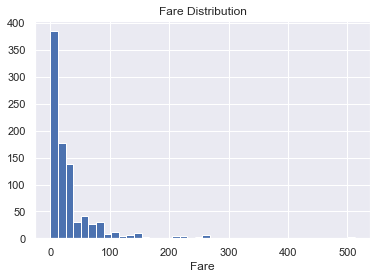

In [243]:
plt.hist(df["Fare"], bins = 40)
plt.title("Fare Distribution")
plt.xlabel("Fare");

Most passengers paid the lowest fares

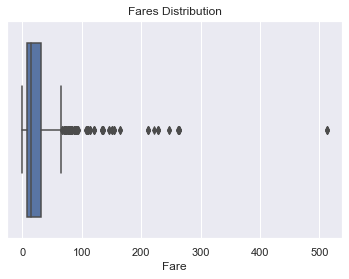

In [244]:
sns.boxplot(data = df, x= "Fare")
plt.title("Fares Distribution");

There are some outliers and some very high fares paid by some passengers

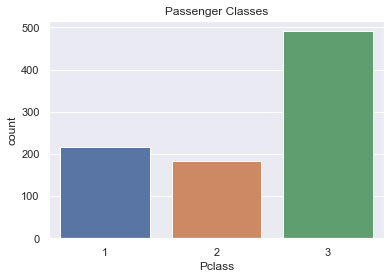

In [245]:
sns.countplot(data = df, x = df["Pclass"])
plt.title("Passenger Classes");

Most passengers travelled by third class with second class having the least amount of passengers

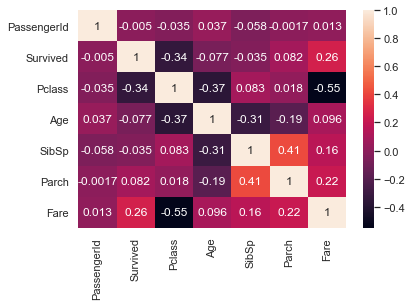

In [246]:
sns.heatmap(df.corr(),annot = True);

Survival weakly correlated with fare and negatively correlated with the other features. Survival more highly correlated with:
* Class 1 passengers
* women
* younger people and
* those paying higher fares

In [247]:
# Drop columns not required - not considered likely to be useful in prediction
df = df.drop(columns = ["PassengerId","Name","Ticket","Cabin","SibSp","Parch","Embarked"],axis = 1)

In [248]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [249]:
# Drop the rows where the age is null
df.dropna(inplace = True)

In [250]:
df.shape

(714, 5)

In [251]:
# Convert categorical features using labelencoder
le = preprocessing.LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [252]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [253]:
# Separate the features into X
X = df[["Pclass","Sex","Age","Fare"]]
X = pd.get_dummies(X, columns = ["Pclass"])
X.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,7.2500,0,0,1
1,0,38.0,71.2833,1,0,0
2,0,26.0,7.9250,0,0,1
3,0,35.0,53.1000,1,0,0
4,1,35.0,8.0500,0,0,1


In [254]:
# Define the target
y = df[["Survived"]]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [255]:
# Set training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(571, 6) (143, 6) (571, 1) (143, 1)


In [256]:
# Convert values to torch tensors
X_train_torch = torch.from_numpy(X_train.values).float()
X_test_torch = torch.from_numpy(X_test.values).float()

In [257]:
X_train_torch

tensor([[ 1.0000, 20.0000,  7.8542,  0.0000,  0.0000,  1.0000],
        [ 1.0000, 22.0000,  7.1250,  0.0000,  0.0000,  1.0000],
        [ 0.0000, 50.0000, 28.7125,  1.0000,  0.0000,  0.0000],
        ...,
        [ 1.0000, 32.0000, 26.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000, 24.5000,  8.0500,  0.0000,  0.0000,  1.0000],
        [ 1.0000, 70.5000,  7.7500,  0.0000,  0.0000,  1.0000]])

In [258]:
print(X_train_torch.shape)
print(X_test_torch.shape)

torch.Size([571, 6])
torch.Size([143, 6])


In [259]:
# Convert the y values to tensors
y_train_torch = torch.from_numpy(y_train.values).view(1,-1)[0] # reshape the tensor to match the loss function as 1D tensor
y_test_torch = torch.from_numpy(y_test.values).view(1,-1)[0]

In [260]:
print(y_train_torch.shape,y_test_torch.shape)

torch.Size([571]) torch.Size([143])


# Building the Neural Network

In [261]:
# Set up parameters for the network

input_size = 6  # number of features to input
output_size = 2  # binary classification - survived or not
hidden_size = 10  # number of neurons in the hidden layer (the number of layers is a hyperparameter)

In [262]:
# Build network as a custom model

class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()  # initialise network before adding layers
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
                
        return F.log_softmax(x, dim = -1)  # used with nn loss which is equivalent of the log operation on the softmax function
                                           # dimension inferred using -1
        
    
        

In [263]:
# instantiate a model by calling the net class
model = Net()  

In [264]:
# instantiate the optimizer with model parameters
optimizer = optim.Adam(model.parameters())  

In [265]:
# Set up loss function
loss_fn = nn.NLLLoss()

In [266]:
epoch_result = []
epochs = 1001

for epoch in range(epochs):
    
    optimizer.zero_grad()  # zero out gradients for each epoch
    y_pred = model(X_train_torch)  # get predicted values for y from running the model against the training set
    
    loss = loss_fn(y_pred , y_train_torch)  # calculate the loss of predicted values against actual
    loss.backward()                         # back propagation to calculate the gradients

    optimizer.step()                        # update the model parameters using optimizer.step()
        
    y_pred_test = model(X_test_torch)              # calculate loss on the test data for each epoch
    loss_test = loss_fn(y_pred_test, y_test_torch)  # don't call the backward function on test as we don't use the losses to update model weights
    
    _,pred = y_pred_test.data.max(1)          # get the maximum value
    
    accuracy = pred.eq(y_test_torch.data).sum().item() / y_test.values.size
    epoch_result.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])
    
    if epoch % 100 == 0:
        print ('epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f'\
               % (epoch, epoch/150 * 10 , loss.data.item(), loss_test.data.item(), accuracy))

epoch - 0 (0%) train loss - 0.81 test loss - 0.80 accuracy - 0.4126
epoch - 100 (6%) train loss - 0.66 test loss - 0.66 accuracy - 0.5874
epoch - 200 (13%) train loss - 0.63 test loss - 0.63 accuracy - 0.5874
epoch - 300 (20%) train loss - 0.61 test loss - 0.60 accuracy - 0.7203
epoch - 400 (26%) train loss - 0.59 test loss - 0.58 accuracy - 0.7273
epoch - 500 (33%) train loss - 0.58 test loss - 0.57 accuracy - 0.7343
epoch - 600 (40%) train loss - 0.53 test loss - 0.52 accuracy - 0.8042
epoch - 700 (46%) train loss - 0.48 test loss - 0.48 accuracy - 0.8252
epoch - 800 (53%) train loss - 0.45 test loss - 0.45 accuracy - 0.8392
epoch - 900 (60%) train loss - 0.44 test loss - 0.44 accuracy - 0.8462
epoch - 1000 (66%) train loss - 0.43 test loss - 0.43 accuracy - 0.8392


# Plotting Results

In [267]:
df_epochs_results = pd.DataFrame(epoch_result, 
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

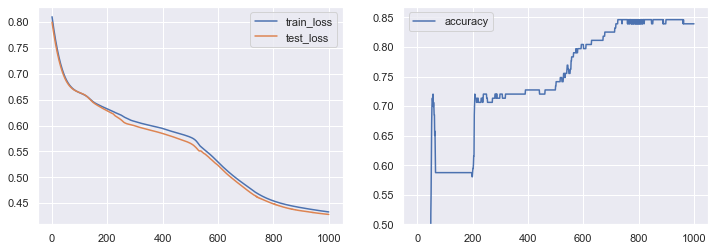

In [268]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df_epochs_results[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_results[["accuracy"]].plot(ax=ax2)
plt.ylim(ymin=0.5)

plt.show()

The torch model returned best accuracy of around 85% predicted correctly as surviving or not. The training and test losses fell to around 800 epochs where it starts to level out.